# **Homework 7**

Due Monday April 12, 2021 at 11:59pm
Submit an ipynb file to gradescope.
Remember to also submit Recitation 8.

Load packages we will use.



In [1]:
#math
import numpy as np
import random

#dataframes
import pandas as pd

#ploting
import matplotlib.pyplot as plt

#regression tools
import statsmodels.api as sm
from patsy import dmatrices

# Problem 1: Confidence intervals

In [2]:
# This function creates some data, fits a linear regression model Y=beta0 + beta1*X,
# and then prints out the model summary and the lower and upper bounds of a 95% confidence
# interval on beta_1.
df = pd.DataFrame()
n = 20
p = 2
df['x'] = np.random.randn(n)
y = np.random.randn(n)
df = sm.add_constant(df)
model = sm.OLS(y,df).fit()
print(model.summary())
conf_int = model.conf_int().loc['x']
lower = conf_int[0]
upper = conf_int[1]
print(f'confidence interval for beta_1 is {lower,upper}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.3725
Date:                Mon, 12 Apr 2021   Prob (F-statistic):              0.549
Time:                        20:13:02   Log-Likelihood:                -31.195
No. Observations:                  20   AIC:                             66.39
Df Residuals:                      18   BIC:                             68.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1381      0.280      0.493      0.6

C:\Users\bls24\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 1A.
What are the values of `beta_0` and `beta_1` used to generate the data in the cell above?
Suppose the 95% confidence interval returned for beta_1 is [-0.36, 0.48], does this contain `beta_1`?

Answer:
* beta_0 coefficient: -.3771
* beta_1 coefficient: -.1489
* YES, the 95% confidence interval specified above does contain beta_1

In [3]:
# This function takes the same functionality and the previous cell,
# but wraps it in a function and returns the result as a dictionary
def example_data():
    df = pd.DataFrame()
    n = 20
    p = 2
    df['x'] = np.random.randn(n)
    y = np.random.randn(n)
    df = sm.add_constant(df)
    model = sm.OLS(y,df).fit()
    conf_int = model.conf_int().loc['x']
    coef = model.params.loc['x']
    lower = conf_int[0]
    upper = conf_int[1]
    #beta_1 = coef[1]
    return {'lower' : lower, 'upper' : upper, 'beta1':coef}#, 'model_check':model.params}

example_data()

{'lower': -1.026528290329942,
 'upper': 0.3475162608887538,
 'beta1': -0.3395060147205941}

In [4]:
# This runs the example_data function many times to generate many independent datasets,
# all using the same values for beta_0 and beta_1. From each dataset, we generate a 95% confidence
# interval for beta_1 and put it into the dataframe conf_int
conf_int = pd.DataFrame(columns=['lower','upper'])
for i in range(100):
    conf_int = conf_int.append(example_data(),ignore_index=True)
conf_int.head()

,lower,upper,beta1
0,-0.065237,0.731387,0.333075
1,-0.367412,1.157405,0.394997
2,-0.235562,0.685014,0.224726
3,-0.318996,0.551429,0.116216
4,-0.808923,0.282077,-0.263423


### 1B

What is the theoretical probability that beta_1 should be contained between the lower and upper bound returned by example_data()? (Though we discussed this in ORIE 3120, you can also answer this based on what you learned about confidence intervals in ENGRD 2700.)

Write code to calculate how often it happens in the data that you generated. In what fraction of the records in conf_int does it happen?

Answer: 95%

In [5]:
lower = list(conf_int["lower"])
upper = list(conf_int["upper"])
beta1 = list(conf_int["beta1"])

In [6]:
count = 0
for i in range(len(lower)):
    if beta1[i] >= lower[i] and beta1[i] <= upper[i]:
        count+=1
print(count*1.0/100)

1.0


Strangely, when I calculate the fraction of the records in conf_int that beta1 is contained between the lower and upper bound, I get an answer of 100% of the time, which differs from the expected result of 95%.

# Problem 2

We have data from an online food delivery service in `PurchaseVsPrice.csv`. This data contains data from an experiment in which the price of a meal was varied between \\$0 and \\$20 to customers that had the company's mobile app installed on their phone.  For each price offered, we see whether or not the meal was purchased, where Y=1 means a purchase was made and Y=0 means it was not.

### 2A. 
Load the data into a dataframe and fit a logistic regression model of the form P(Y=1|X) = L(beta_0+beta_1*X). Here, Y=1 indicates purchase, Y=0 indicates no purchase, and X is the price. What are the fitted values of beta_0 and beta_1?  Are these parameter statistically significant at the 95\% level?

In [7]:
df = pd.read_csv('PurchaseVsPrice.csv') #QUESTION -- what does the Y=1 mean here? Am I building this model correctly?
df.head()

,price,purchase
0,0.669310,1
1,5.268658,1
2,17.370370,0
3,7.076877,1
4,3.341077,1


In [8]:
X = df["price"]
Y = df["purchase"]
X = sm.add_constant(X)
model = sm.Logit(Y,X).fit()

Optimization terminated successfully.
         Current function value: 0.387791
         Iterations 7


In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               purchase   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99998
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Apr 2021   Pseudo R-squ.:                  0.4229
Time:                        20:13:04   Log-Likelihood:                -38779.
converged:                       True   LL-Null:                       -67200.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0262      0.021    144.250      0.000       2.985       3.067
price         -0.3861      0.002   -167.361      0.000      -0.391      -0.382
==============================================================================
"""

beta_0 is 3.03 and beta_1 is -.386. Both of these parameters are statistically significant at the 95% level.

### 2B.
Using a pandas groupby and the round function, create a dataframe that consists of:
* the price rounded to the nearest 0.1 dollar
* the fraction of time that the consumer purchased the meal for each rounded price
We call this second bullet point the "empirical probability of purchase".

Then plot the empirical probability of purchase vs. the rounded price as a collection of dots.

Also, use your fitted logistic regression model to predict what the probability of purchase should be at each rounded price and plot this as a line.  

You should see that both the empirical probability of purchase and your prediction decrease with the price, but that your prediction has a different shape.  In particular, your prediction should be larger than the empirical probability of a purchase at low prices.

In [10]:
rounded_df = df.round(1)
grouped_df = rounded_df.groupby('price').agg({"purchase":[np.sum,'count']})
grouped_df = grouped_df.reset_index()
grouped_df['empirical probability of purchase'] = grouped_df['purchase']['sum'] / grouped_df["purchase"]['count']
grouped_df = grouped_df[['price','empirical probability of purchase']]
grouped_df.head()

,price,empirical probability of purchase
,,
0,0.0,0.789062
1,0.1,0.774947
2,0.2,0.822857
3,0.3,0.793173
4,0.4,0.790123


In [11]:
x_value = grouped_df['price'].values
x_value_constant = sm.add_constant(x_value)
y_value = grouped_df['empirical probability of purchase']
model_line = model.predict(x_value_constant)

Text(0, 0.5, 'empirical probability')

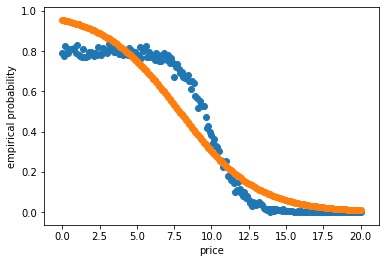

In [12]:
plt.scatter(x_value,y_value) #QUESTION -- how do I plot my logistic model on this graph/use it for predictions?
plt.scatter(x_value, model_line)
#plt.plot(x_value,model_line,c='red')
plt.xlabel("price")
plt.ylabel("empirical probability")

### 2C.
To better explain the data, we are going to fit a different model. We are going to assume that the data was generated from the model P(Y=1|X) = q*L(beta_0 + beta_1 * x), for some parameters q, beta_0, and beta_1.  This is because the customers were offered the product with a push notification, and only a fraction q of the customers actually looked at their phone when the push notification was sent. For those that ignored the push notification, the price has no impact and they didn't purchase a meal.

We will then estimate these three parameters via maximum likelihood estimation.  As a first step, write down a formula for the likelihood. This is clearest when done in latex. Some examples are given below to help you.

Your answer should depend on:
* $q$
* $\beta_0$
* $\beta_1$
* $y_i$ (whether the i-th customer in the dataset mode a purchase or not)
* $x_i$ (the price shown to the i-th customer in the dataset)

Then, write down the natural logarithm of the likelihood.

Formula for likelihood

$\prod_{i=1}^n (q*L(\beta_0+\beta_1*x_i))(X_{i,1} , ... , X_{i,((q*L(\beta_0+\beta_1*x_i)))} )^{y_i} (1-(q*L(\beta_0+\beta_1*x_i))(X_{i,1} , ... , X_{i,(q*L(\beta_0+\beta_1*x_i))}))^{1-y_i}$

Natural Log of the likelihood

$\sum_{i=1}^n y_i * \ln( (q*L(\beta_0+\beta_1*x_i))(X_{i,1} , ... , X_{i,((q*L(\beta_0+\beta_1*x_i)))} ) + (1-y_i) * \ln((1-(q*L(\beta_0+\beta_1*x_i))(X_{i,1} , ... , X_{i,(q*L(\beta_0+\beta_1*x_i))})) )$

Examples of using latex in a python notebook

* Writing a product: $\prod_{i=1}^n a_i$
* Writing a sum: $\sum_{i=1}^n b_i$
* Writing greek letters: $\beta_j$, $\alpha_5$, $\gamma_2$
* Raising something to a power: $a^{b+c}$
* Putting something in a subscript: $z_k$
* Taking the log: $\log(5)$

### 2D
Write a function called `log_likelihood` that calculates the log likelihood. It should take as input `q`, `beta_0`, and `beta_1` and it should also use the data that you loaded above in part A.  To help you, the following code will compute the logistic function on each entry in a Pandas Series and return the result as another series.  Calculate the log likelihood at `q`=0.5, `beta_0` = 1, and `beta_1` = 1.

In [20]:
df.head()

,price,purchase
0,0.669310,1
1,5.268658,1
2,17.370370,0
3,7.076877,1
4,3.341077,1


In [13]:
def L(x):
    return 1./(1+np.exp(-x))

In [37]:
def log_likelihood(q,beta_0,beta_1):
    first_term = (df["purchase"]) * np.log(q*L(beta_0 + beta_1 * df['price']))
    second_term = (1-df["purchase"]) * np.log(1 - (q*L(beta_0 + beta_1 * df['price'])))
    answer = first_term + second_term
    return(answer.sum())

In [38]:
log_likelihood(.5,1,1)

-70358.77854754729

### 2E

To find the maximum likelihood estimate, we will use random search. You may find code from Recitation 8 helpful here, where we used random search for a different purpose.

To do this, create a new dataframe called `newdata` that contains 1000 records and these three fields, generated at random:
* Draw `q` from a uniform between 0 and 1
* Draw `beta_0` from a uniform between 0 and 20
* Draw `beta_1` from a uniform between -2 and 0

Then, add a new field called `log_likelihood` and for each record set it equal to the value of your `log_likelihood` function evaluated at the `q`, `beta_0`, and `beta_1` in the other fields in this record.  To help you, one way to create new entries one record at a time using iterrows() (which you used in a previous recitation) is below.

Then, find the record in `newdata` with the largest value for `log_likelihood`.  Create values `mle_q`, `mle_beta0`, and `mle_beta1` equal to the values of the three parameters in this record. What are these values?

In [39]:
# To help you, here is some example code that generates a dataframe with some random values, 
# and then creates a new field that has the result of a function evaluated on the other fields.
newdata = pd.DataFrame()
N = 1000
np.random.seed(10)
newdata['example0'] = np.random.uniform(-2,4,N) # Generate some random data
newdata['example1'] = np.random.uniform(-2,4,N) # Generate some random data

def fn(x,y):
    if x<y:
        return 5
    else:
        return 2

newdata['example2']=0
for index, row in newdata.iterrows():
    newdata.loc[index,'example2'] = fn(row['example1'],row['example2'])

In [40]:
newdata = pd.DataFrame()
N = 1000
np.random.seed(10)
newdata['q'] = np.random.uniform(0,1,N)
newdata['beta_0'] = np.random.uniform(0,20,N) # Generate some random data
newdata['beta_1'] = np.random.uniform(-2,0,N) # Generate some random data

newdata['log_likelihood'] = 0
for index, row in newdata.iterrows():
    newdata.loc[index, 'log_likelihood'] = log_likelihood(row['q'],row['beta_0'],row['beta_1'])

In [42]:
df_max_likelihood = newdata[newdata['log_likelihood'] == newdata['log_likelihood'].max()]
df_max_likelihood

,q,beta_0,beta_1,log_likelihood
511,0.800694,10.307195,-1.032002,-34933.048855


### 2F
For each rounded price that you plotted against in 2B, plot:
* the empirical purchase probability, as a dot
* the probability of a purchase according to the model that you fit using maximum likelihood estimation, as a line
    
You should see that the probability of purchase according to maximum likelihood estimation fits the data much better than your earlier logistic regression model.

In [53]:
probability_purchase = .800694 * L(10.307195-1.032002*x_value)

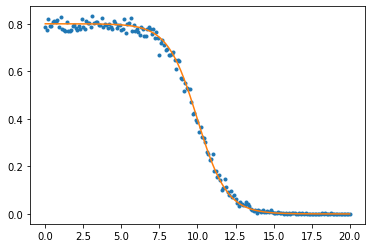

In [54]:
plt.plot(x_value,y_value,'.')
plt.plot(x_value,probability_purchase, '-')

## Problem 3: Multiple Linear Regression and Understanding p-values

In this problem, we will try to predict the energy used by appliances based on the temperature in and humidity of various rooms of a house and the outside weather conditions. We will use 'energydata.csv'. The full dataset and descriptions of the columns can be found [here](http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction#). Please use the data posted on the website for analysis as we have removed some columns and filtered the data. 

a. Begin by loading the data. Display the names of the columns and the first 5 rows. (It is often a good idea to display column names and a few rows to make sure you understand what is included in the data you imported.)

In [16]:
#Code Here
energy_df = pd.read_csv('energydata.csv')
energy_df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,19.890000,47.596667,19.200000,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,18.20,48.900000,17.033333,45.530,6.6,733.5,92.0,7.0,63.0,5.3
1,40,21.390000,44.560000,20.790000,43.863333,20.20,45.663333,20.633333,46.790000,19.200000,...,19.39,51.163333,16.890000,45.700,5.3,736.9,92.0,6.0,22.0,4.1
2,50,20.100000,46.363333,19.500000,44.790000,20.29,45.590000,19.760000,46.590000,18.500000,...,19.10,54.290000,17.100000,49.260,5.0,739.9,91.0,5.0,40.0,3.6
3,50,19.890000,46.766667,19.033333,44.500000,20.00,44.790000,20.133333,44.700000,18.033333,...,18.50,49.000000,17.050000,45.245,6.4,743.3,86.0,5.0,40.0,4.2
4,60,20.066667,42.833333,19.000000,42.418182,19.79,44.700000,19.260000,42.560000,17.600000,...,18.60,45.790000,17.100000,43.260,6.5,744.2,75.0,7.0,29.0,2.3


b. Use sm.OLS().fit to build a linear model. Print the model summary. 

In [17]:
#Code Here
X = energy_df.iloc[:,1:]
Y = energy_df["Appliances"]
X = sm.add_constant(X)
lin_model = sm.OLS(Y,X).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     4.247
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           2.07e-10
Time:                        20:13:05   Log-Likelihood:                -3282.8
No. Observations:                 549   AIC:                             6616.
Df Residuals:                     524   BIC:                             6723.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.9536    600.978      0.003      0.997   -1178.669    1182.576
T1             -2.1323     11.368     -0.188      0.851     -24.464      20.200
RH_1           12.9817      4.888      2.656      0.008       3.378      22.585
T2            -28.2677     10.099     -2.799      0.005     -48.108      -8.427
RH_2          -15.1415      5.216     -2.903      0.004     -25.388      -4.895
T3             32.3508      6.693      4.833      0.000      19.202      45.499
RH_3            6.2454      4.273      1.462      0.144      -2.149      14.640
T4             11.7059      5.939      1.971      0.049       0.038      23.373
RH_4            7.6966      3.940      1.953      0.051      -0.044      15.438
T5            -10.0444      7.698     -1.305      0.193     -25.168       5.079
RH_5            0.5142      0.632      0.814      0.416      -0.726       1.755
T6              9.1660      4.135      2.217      0.027       1.044      17.288
RH_6            0.4448      0.439      1.013      0.312      -0.418       1.308
T7            -15.2589      8.119     -1.879      0.061     -31.209       0.691
RH_7           -1.7082      2.695     -0.634      0.527      -7.003       3.587
T8              7.0290      5.958      1.180      0.239      -4.675      18.733
RH_8           -6.0909      2.354     -2.588      0.010     -10.715      -1.467
T9              1.1775     11.184      0.105      0.916     -20.793      23.148
RH_9           -2.2504      2.723     -0.826      0.409      -7.600       3.099
T_out         -12.0544      9.313     -1.294      0.196     -30.349       6.240
Press_mm_hg     0.1607      0.682      0.236      0.814      -1.178       1.500
RH_out         -1.6528      1.937     -0.853      0.394      -5.458       2.152
Windspeed       2.8774      2.128      1.352      0.177      -1.303       7.058
Visibility     -0.1211      0.320     -0.378      0.706      -0.750       0.508
Tdewpoint       2.2306      8.939      0.250      0.803     -15.330      19.792
==============================================================================
Omnibus:                      435.840   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7322.532
Skew:                           3.465   Prob(JB):                         0.00
Kurtosis:                      19.495   Cond. No.                     1.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c. Which inputs are significant at the $\alpha=0.05$ level?


Ans: RH_1, T2, RH_2, T3, T4, T6, RH_8

d. You decide you want a model with only 5 features. Build a new model with the five features that had the smallest p-values in the previous model. Which features do you select?

In [18]:
#Code Here
features = ['RH_1', 'T2', 'RH_2', 'T3', 'RH_8'] #QUESTION -- SHOULD I KEEP THE CONSTANT ?
X = X[features]
new_model = sm.OLS(Y, X).fit()

Ans: RH_1, T2, RH_2, T3, RH_8

In [19]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Appliances   R-squared (uncentered):                   0.489
Model:                            OLS   Adj. R-squared (uncentered):              0.484
Method:                 Least Squares   F-statistic:                              104.1
Date:                Mon, 12 Apr 2021   Prob (F-statistic):                    6.10e-77
Time:                        20:13:05   Log-Likelihood:                         -3308.2
No. Observations:                 549   AIC:                                      6626.
Df Residuals:                     544   BIC:                                      6648.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RH_1          19.6565      3.124      6.293      0.000      13.520      25.792
T2           -16.2112      4.918     -3.297      0.001     -25.871      -6.551
RH_2         -13.8212      3.091     -4.472      0.000     -19.892      -7.750
T3            15.3860      4.516      3.407      0.001       6.515      24.257
RH_8          -3.5040      1.323     -2.649      0.008      -6.103      -0.905
==============================================================================
Omnibus:                      465.987   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9015.299
Skew:                           3.771   Prob(JB):                         0.00
Kurtosis:                      21.364   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""